In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
'''
class CustomLinearRegression:
    def __init__(self, number_of_iterations=1000, learning_rate=0.1, regularize=False, regularization_strength=0.1, verbose=False, log_every=100, tolerance = 0.001):
        self.weights : np.ndarray = None  # (n_features, )
        self.bias : float = None  # scalar
        self.number_of_iterations : int = number_of_iterations
        self.learning_rate : float = learning_rate
        self.regularize = regularize
        self.regularization_strength = regularization_strength
        self.final_cost : float = 0.0
        self.cost_history : list[float] = []
        self.verbose : bool = verbose
        self.log_every : int = log_every
        self.tolerance : float = tolerance

    def _init_parameters(self, number_of_features):
        self.weights = np.random.uniform(-0.01, 0.01, number_of_features)
        self.bias = 0

    def _compute_loss(self, y, y_hat) -> float:
        error = y - y_hat
        mean_squared_error = np.mean(error ** 2)

        if self.regularize:
            l2 = self.regularization_strength * np.sum(self.weights ** 2)
            return 1/2 * (mean_squared_error + l2)
        
        return 1/2 * mean_squared_error
    
    def _forward_propagation(self, X, y):
        y_hat = X @ self.weights + self.bias
        cost = self._compute_loss(y, y_hat)
        self.cost_history.append(cost)
        return y_hat, cost
    
    def _backward_propagation(self, X, y, y_hat):
        number_of_samples = X.shape[0]
        error = y_hat - y

        bias_derivative = np.mean(error)

        # weights gradient without regulariztion
        weights_gradient = 1 / number_of_samples * (X.T @ error)

        # add L2 regularization if enabled
        if self.regularize:
            weights_gradient += self.regularization_strength * self.weights
        
        return weights_gradient, bias_derivative
    
    def _update(self, weights_gradient, bias_derivative):
        self.weights = self.weights - self.learning_rate * weights_gradient
        self.bias = self.bias - self.learning_rate * bias_derivative

    def fit(self, X, y):
        self._init_parameters(X.shape[1])
        previous_cost = np.inf

        for iteration in range(self.number_of_iterations):
            y_hat, cost = self._forward_propagation(X, y)
            
            if self.verbose == True and abs(previous_cost - cost) < self.tolerance:
                print(f'Early stopping at iteration: {iteration} due to ΔCost being less {self.tolerance}')
                break

            if self.verbose and (iteration % self.log_every == 0 or iteration == self.number_of_iterations - 1):
                print(f'Iteration: {iteration} | Cost: {cost:.5f} | Weights Norm: {np.linalg.norm(self.weights)}')
            
            previous_cost = cost
            weights_derivative, bias_derivative = self._backward_propagation(X, y, y_hat)
            self._update(weights_derivative, bias_derivative)

 
        self.final_cost = cost
        return self

    def predict(self, X):
        predictions = X @ self.weights + self.bias
        return predictions
    
    def get_parameters(self):
        return self.weights, self.bias
    
    def plot_losses(self, ax=None):
        if ax is None:
            ax = plt.gca()
        
        sns.lineplot(self.cost_history, label=f'Final cost: {self.final_cost:.5f}', ax=ax)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost')
        ax.set_title('Training Cost Vs Iteration')
        ax.grid()
        ax.legend()

    # Not a useful plot unless data is a time series

    # @staticmethod
    # def plot_residuals(residuals, ax=None):
    #     if ax is None:
    #         ax = plt.gca()

    #     ax.scatter(x=np.arange(len(residuals)), y=residuals, alpha=0.7)
    #     ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
        
    #     ax.set_xlabel('X axis')
    #     ax.set_ylabel('Residuals')
    #     ax.set_title('Residuals plot')
    #     ax.grid()
'''

"\nclass CustomLinearRegression:\n    def __init__(self, number_of_iterations=1000, learning_rate=0.1, regularize=False, regularization_strength=0.1, verbose=False, log_every=100, tolerance = 0.001):\n        self.weights : np.ndarray = None  # (n_features, )\n        self.bias : float = None  # scalar\n        self.number_of_iterations : int = number_of_iterations\n        self.learning_rate : float = learning_rate\n        self.regularize = regularize\n        self.regularization_strength = regularization_strength\n        self.final_cost : float = 0.0\n        self.cost_history : list[float] = []\n        self.verbose : bool = verbose\n        self.log_every : int = log_every\n        self.tolerance : float = tolerance\n\n    def _init_parameters(self, number_of_features):\n        self.weights = np.random.uniform(-0.01, 0.01, number_of_features)\n        self.bias = 0\n\n    def _compute_loss(self, y, y_hat) -> float:\n        error = y - y_hat\n        mean_squared_error = np.mean

In [3]:
class CustomLinearRegression:
    def __init__(self, number_of_iterations=1000, learning_rate=0.1,
                #  regularize=False, regularization_strength=0.1, verbose=False, log_every=100, tolerance = 0.001
                 ):
        self.weights : np.ndarray = None  # (n_features, )
        self.bias : float = None  # scalar
        self.number_of_iterations : int = number_of_iterations
        self.learning_rate : float = learning_rate
        # self.regularize = regularize
        # self.regularization_strength = regularization_strength
        self.cost_history : list[float] = []
        # self.verbose : bool = verbose
        # self.log_every : int = log_every
        # self.tolerance : float = tolerance

    def _init_parameters(self, number_of_features):
        self.weights = np.random.normal(loc=-0.01, scale=0.01, size=number_of_features)
        self.bias = 0

    def _compute_loss(self, y, y_hat) -> float:
        error = y - y_hat
        squared_error = np.square(error)
        mean_squared_error = np.mean(squared_error)

        # if self.regularize:
        #     l2 = self.regularization_strength * np.sum(self.weights ** 2)
        #     return 1/2 * (mean_squared_error + l2)
        
        return 1/2 * mean_squared_error
    
    def _forward_propagation(self, X, y):
        y_hat = X @ self.weights + self.bias
        cost = self._compute_loss(y, y_hat)
        self.cost_history.append(cost)
        return y_hat, cost
    
    def _backward_propagation(self, X, y, y_hat):
        number_of_samples = X.shape[0]
        error = y_hat - y

        bias_derivative = np.mean(error)

        # weights gradient without regulariztion
        weights_gradient = 1 / number_of_samples * (X.T @ error)

        # add L2 regularization if enabled
        # if self.regularize:
        #     weights_gradient += self.regularization_strength * self.weights
        
        return weights_gradient, bias_derivative
    
    def _update(self, weights_gradient, bias_derivative):
        self.weights = self.weights - self.learning_rate * weights_gradient
        self.bias = self.bias - self.learning_rate * bias_derivative

    def fit(self, X, y):
        self._init_parameters(X.shape[1])
        # previous_cost = np.inf

        for iteration in range(self.number_of_iterations):
            y_hat, cost = self._forward_propagation(X, y)
            
            # if self.verbose == True and abs(previous_cost - cost) < self.tolerance:
            #     print(f'Early stopping at iteration: {iteration} due to ΔCost being less {self.tolerance}')
            #     break

            # if self.verbose and (iteration % self.log_every == 0 or iteration == self.number_of_iterations - 1):
            #     print(f'Iteration: {iteration} | Cost: {cost:.5f} | Weights Norm: {np.linalg.norm(self.weights)}')
            
            # previous_cost = cost
            weights_derivative, bias_derivative = self._backward_propagation(X, y, y_hat)
            self._update(weights_derivative, bias_derivative)

 
        return self

    def predict(self, X):
        predictions = X @ self.weights + self.bias
        return predictions
    
    def get_parameters(self):
        return self.weights, self.bias
    
    def plot_losses(self, ax=None):
        if ax is None:
            ax = plt.gca()
        
        sns.lineplot(self.cost_history, label=f'Final cost: {self.cost_history[-1]:.5f}', ax=ax)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost')
        ax.set_title('Training Cost Vs Iteration')
        ax.grid()
        ax.legend()

The Linear Regression implementation will have the following steps:
1. Forward Propagation:
    - Feed the features into the model, by multiplying the features matrix with the weights and adding bias
    - This will result in a predictions vector
    - Calculate the error. The error will be the difference between the predictions and true values of the target
    - We will keep training of these errors in a list and plot them (we should the errors decreasing as the model iterates)
2. Backward Propagation:
    - Calculate the weights gradient
    - Calculate the bias derivative
    - Return both
3. Update the weights
    - Update the weights using the learning rate and weights gradient. 
    - Update the bias derivative using the learning rate and bias derivative
    
These steps will repeat for a number of iteration decided upon when initializing the model.

#### 1. Generate the synthetic data

In [4]:
from sklearn.datasets import make_regression

features_synthetic, target_synthetic, true_weights = make_regression(n_samples=30000,
                                                                     n_features=15,  
                                                                     n_informative=10,
                                                                     bias=-10,   # bias of the data (intercept)
                                                                     coef=True,  # return the true coefficients (aka weights)
                                                                     noise=75,
                                                                     random_state=42)

#### 2. Split the data to training and testing sets

In [5]:
from sklearn.model_selection import train_test_split

X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(
    features_synthetic, target_synthetic, test_size=0.3, random_state=100, shuffle=True
)

#### 3. Fit the model and make predictions

In [6]:
lr_custom = CustomLinearRegression(learning_rate=0.001, number_of_iterations=5000,
                                #    regularize=True, regularization_strength=0.001, verbose=True, log_every=500
                                   ).fit(X_train_synthetic, y_train_synthetic)
predictions = lr_custom.predict(X_test_synthetic)

#### 4. Compare the true weights from the data, and the weights the model predicted

In [7]:
true_weights_and_bias = [np.round(weight, 2) for weight in true_weights]
predicted_weights_and_bias = [round(weight, 2) for weight in lr_custom.weights]

print(f'True bias: {-10}')
print(f'Predicted bias: {lr_custom.bias}')

pd.DataFrame({'True': true_weights_and_bias, 'Predicted': predicted_weights_and_bias}).T

True bias: -10
Predicted bias: -10.662479676450966


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
True,30.08,31.09,26.65,0.00,0.00,0.0,64.09,0.00,22.31,33.33,91.30,52.91,0.00,27.46,89.45
Predicted,29.44,31.05,26.12,-0.44,0.09,0.2,63.60,-1.32,23.06,33.66,90.87,52.74,0.92,27.56,89.60


We see here, that our model is working beautifully. <br>
Our predicted weights and bias are very close to the true weights of the data. <br>
There's 5 features that are still close, but with a higher error. <br>
These are the non-informative features. <br>
In the data generating, the informative features were 10, in a total number of features of 15. <br>

In [1]:
import sys
sys.path.append('../')

from my_utils.regression_eval_plots import EvaluationPlots

/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


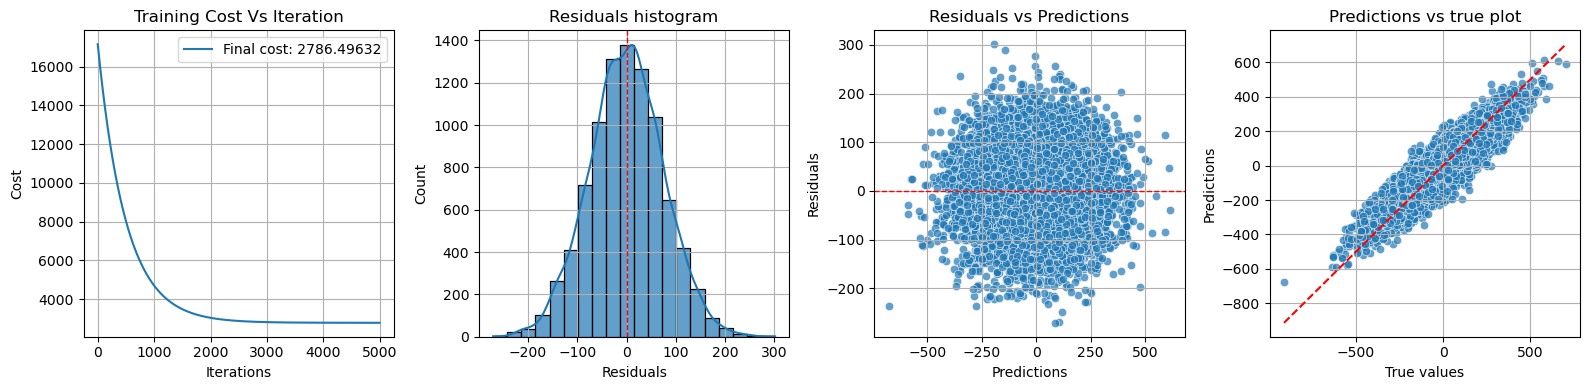

In [10]:
# plot the evaluation plots
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

lr_custom.plot_losses(ax=axes[0])

EvaluationPlots.plot_residuals_histogram(y_test_synthetic - predictions, ax=axes[1])
EvaluationPlots.plot_residuals_vs_predictions(predictions, y_test_synthetic - predictions, ax=axes[2])
EvaluationPlots.plot_predictions_vs_true(y_test_synthetic,  predictions, ax=axes[3])

figure.tight_layout()